In [13]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

You do not need to worry about the working of these functions. They hold no conceptual value.

In [14]:
def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='#1e90ff'):
    y = x*slope + intercept
    plots.plot(x, y, color=color, lw=3)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color, lw=3)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

## Review

In [16]:
families = Table.read_table('family_heights.csv')
families.where('family','1')

family,father,mother,child,children,order,sex
1,78.5,67,73.2,4,1,male
1,78.5,67,69.2,4,2,female
1,78.5,67,69,4,3,female
1,78.5,67,69,4,4,female


In [17]:
parent_avgs = (families.column('father') + families.column('mother'))/2
heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
)
heights.show(4)

Parent Average,Child
72.75,73.2
72.75,69.2
72.75,69
72.75,69


Note: Child heights are the **adult** heights of children in a family.

In [18]:
def nn_prediction_height(p_avg):
    """Predict the height of a child whose parents have a parent average height of p_avg.
    
    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.5.
    """
    
    close_points = heights.where('Parent Average', are.between(p_avg-0.5, p_avg + 0.5))
    return np.average(close_points.column('Child')) 

In [19]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x)) / np.std(x)

In [20]:
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

### True or False?

- If the correlation of x and y is close to 0, then knowing one cannot help us predict the other.

In [10]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.show(3)

x,y
-4,16
-3.5,12.25
-3,9


In [11]:
correlation(nonlinear, 'x', 'y')

0.0

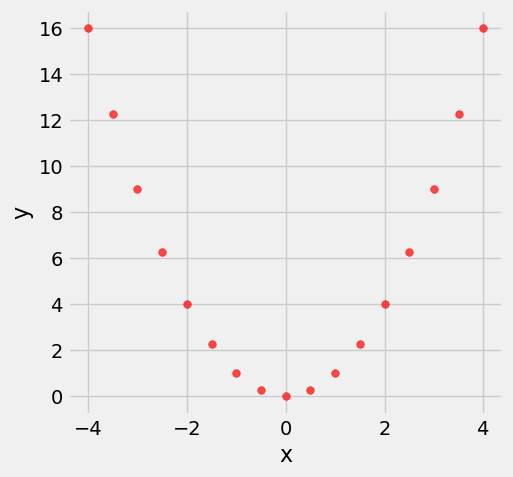

In [12]:
nonlinear.scatter('x', 'y', s=30, color='r')

The statement is **False**.

## New material

### Where is the prediction line?

#### $r$ = 0

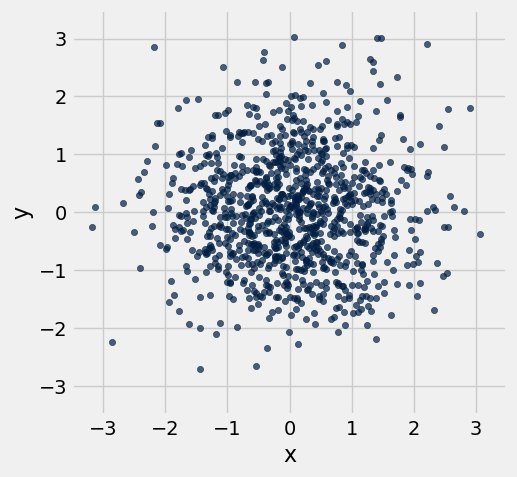

In [26]:
example = r_table(0)
example.scatter('x', 'y')
resize_window()

In [27]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

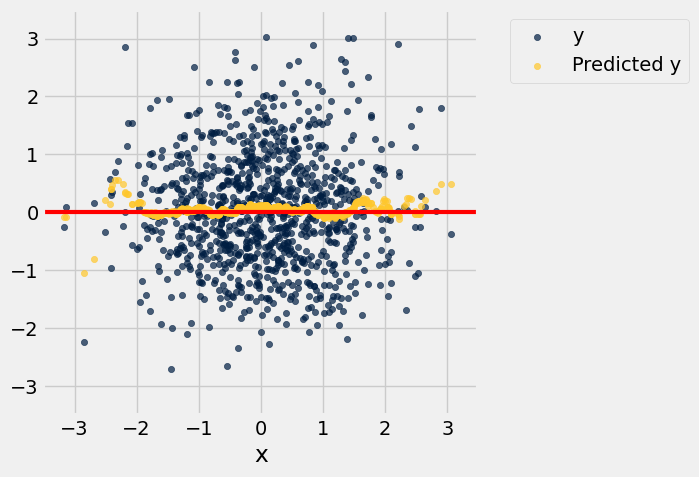

In [28]:
example.scatter('x')
draw_line(slope = 0, color = 'red')
resize_window()

#### $r$ = 0.99

In [29]:
example = r_table(0.99)
example.show(3)

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316


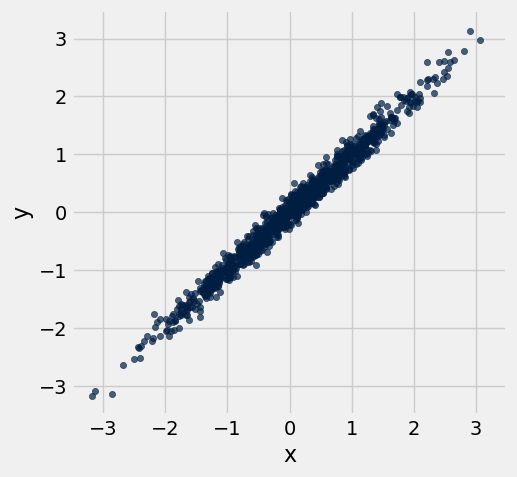

In [30]:
example.scatter('x', 'y')
resize_window()

In [32]:
def nn_prediction_example(x_val):
    """ Predicts y-value for x based on the example table """
    neighbors = example.where('x', are.between(x_val - .25, x_val + .25))
    return np.mean(neighbors.column('y'))   

In [33]:
nn_prediction_example(-2.25)

-2.1476337989800527

In [34]:
example = example.with_columns(
    'Predicted y', 
    example.apply(nn_prediction_example, 'x'))

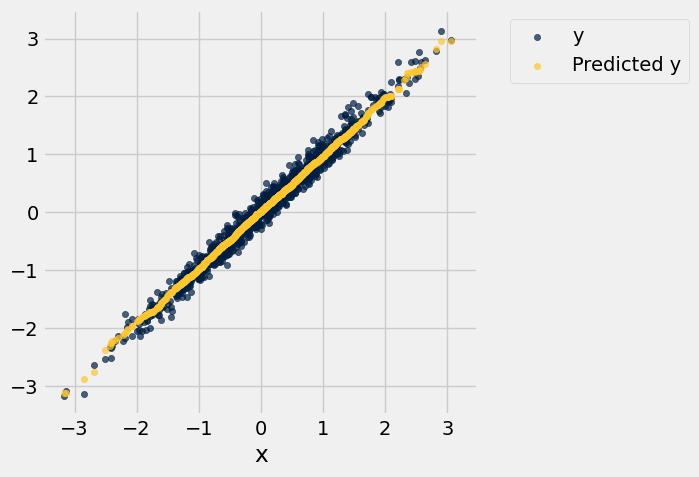

In [35]:
example.scatter('x')
resize_window()

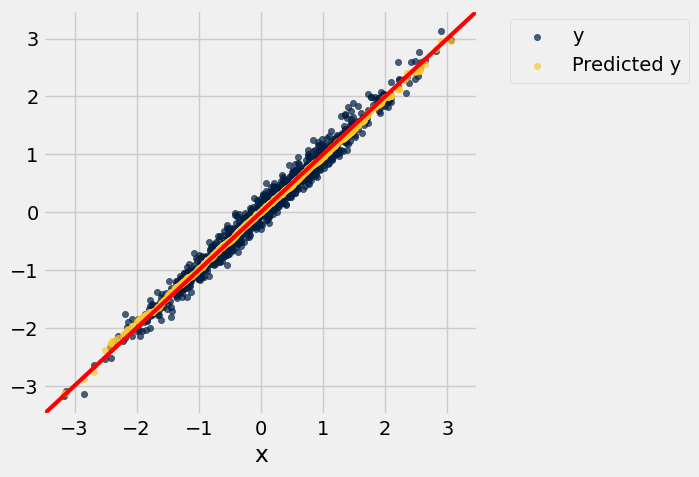

In [36]:
example.scatter('x')
draw_line(slope=1, color = 'red')
resize_window()

#### $r$ = 0.5

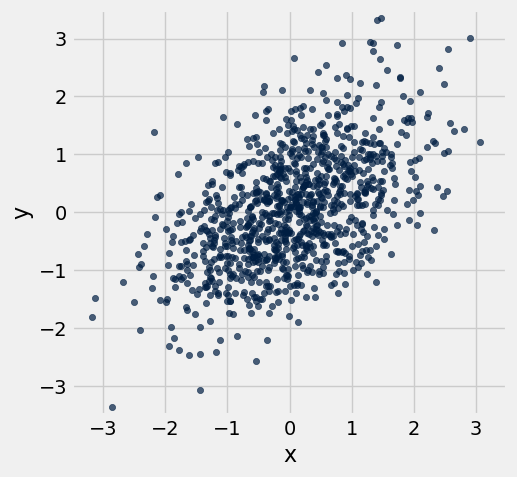

In [37]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()

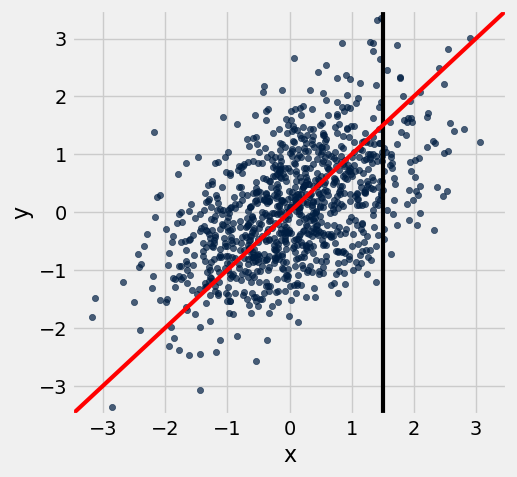

In [38]:
example = r_table(0.5)
example.scatter('x', 'y')
resize_window()
draw_vertical_line(1.5)
draw_line(slope=1, intercept=0, color='red')

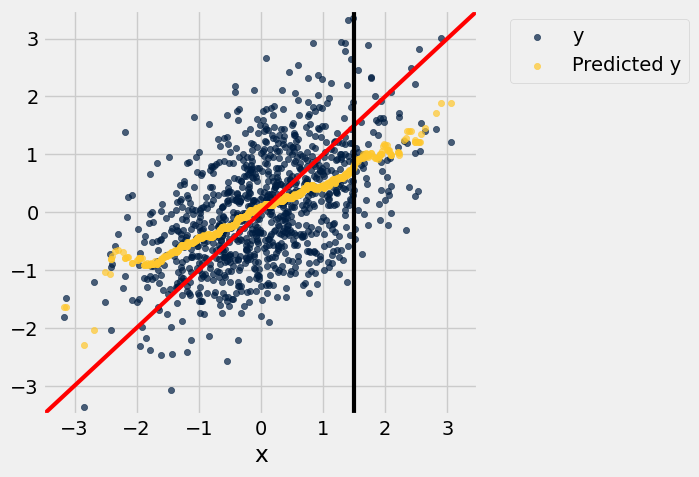

In [39]:
example = example.with_column('Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=1, color='red')
draw_vertical_line(1.5)
resize_window()

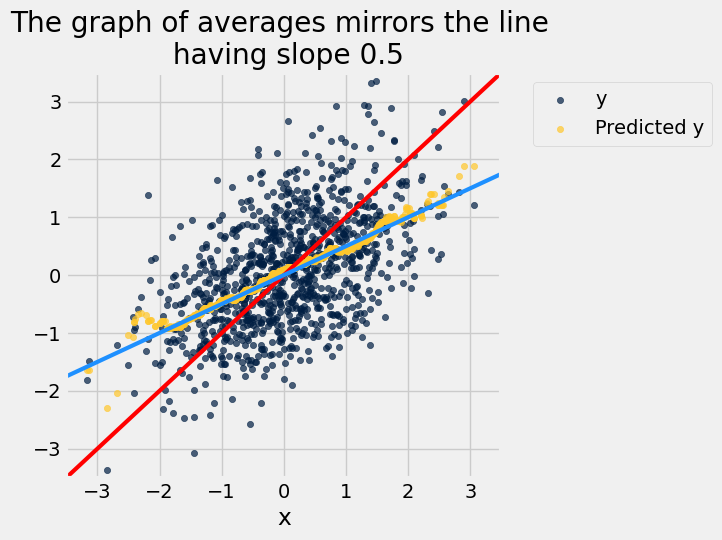

In [40]:
example.scatter('x')
draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.5, intercept=0)
plots.title('The graph of averages mirrors the line \n having slope 0.5')
resize_window()

#### $r$ = 0.7

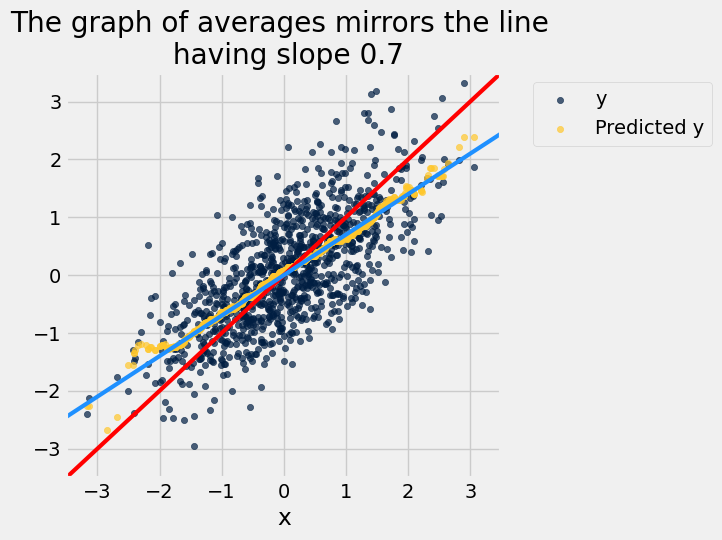

In [41]:
example = r_table(0.7)
example = example.with_column('Predicted y', example.apply(nn_prediction_example, 'x'))
example.scatter('x')
draw_line(slope=1, intercept=0, color='red')
draw_line(slope=0.7, intercept=0, color='dodgerblue')
plots.title('The graph of averages mirrors the line \n having slope 0.7')
resize_window()

### Defining the linear regression line in standard units

In [35]:
def slope(t, x, y):
    """Computes the slope of the regression line"""
    r = correlation(t, x, y)
    y_sd = np.std(t.column(y))
    x_sd = np.std(t.column(x))
    return r * y_sd / x_sd

In [36]:
def intercept(t, x, y):
    """Computes the intercept of the regression line"""
    x_mean = np.mean(t.column(x))
    y_mean = np.mean(t.column(y))
    return y_mean - slope(t, x, y)*x_mean

In [ ]:
example = r_table(0.5)
slope(example, 'x', 'y')

_____

In [32]:
heights_with_predictions = heights.with_column(
    'Nearest neighbor prediction', 
    heights.apply(nn_prediction_height, 'Parent Average'))
heights_with_predictions.show(5)

Parent Average,Child,Nearest neighbor prediction
72.75,73.2,70.1
72.75,69.2,70.1
72.75,69,70.1
72.75,69,70.1
71,73.5,70.4158


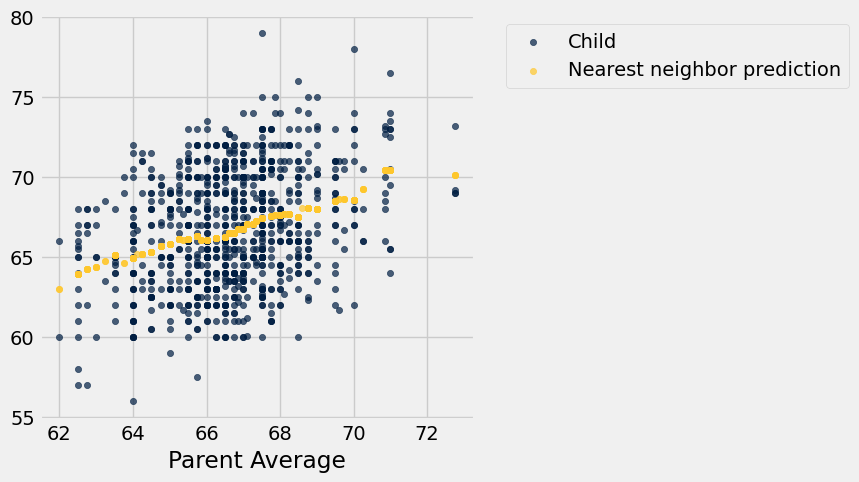

In [33]:
heights_with_predictions.scatter('Parent Average')

In [37]:
predicted_heights_slope = slope(heights, 'Parent Average', 'Child')
predicted_heights_intercept = intercept(heights, 'Parent Average', 'Child')
[predicted_heights_slope, predicted_heights_intercept]

[0.66449526235258838, 22.461839955758798]

In [38]:
heights_with_predictions = heights_with_predictions.with_column(
    'Regression Prediction', 
    predicted_heights_slope*heights.column('Parent Average') + predicted_heights_intercept
)
heights_with_predictions

Parent Average,Child,Nearest neighbor prediction,Regression Prediction
72.75,73.2,70.1,70.8039
72.75,69.2,70.1,70.8039
72.75,69,70.1,70.8039
72.75,69,70.1,70.8039
71,73.5,70.4158,69.641
71,72.5,70.4158,69.641
71,65.5,70.4158,69.641
71,65.5,70.4158,69.641
69.5,71,68.5025,68.6443
69.5,68,68.5025,68.6443


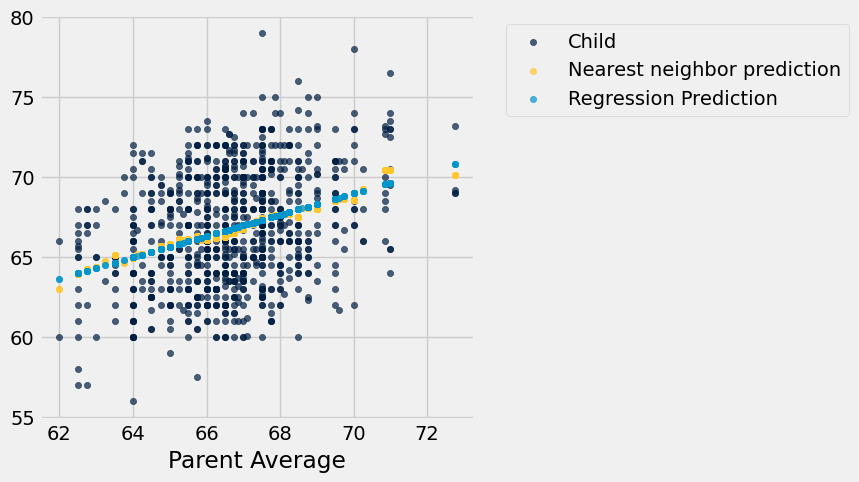

In [39]:
heights_with_predictions.scatter('Parent Average')

#### Can you predict students' final scores?

In [43]:
# x variable: midterm scores
midterm_mean = 70
midterm_sd = 10

# y variable: final scores
final_mean = 50
final_sd = 12

# Correlation (relates x to y values)
corr = 0.75

# new observation's x value
midterm_student = 90

In [44]:
midterm_student_su = (midterm_student - midterm_mean) / midterm_sd
midterm_student_su

2.0

In [45]:
final_student_su = midterm_student_su * corr
final_student_su

1.5

In [46]:
final_student = final_student_su * final_sd + final_mean
final_student

68.0